In [48]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack, csr_matrix

In [51]:
df = pd.read_csv('dataset.csv')

In [52]:
ncols, nrows = df.shape
print(f' {ncols} rows and {nrows} columns')

 114000 rows and 21 columns


In [53]:
df.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [54]:
df.isnull().sum().sum()


np.int64(3)

In [55]:
df=df.dropna()

In [56]:
duplicated_rows = df.duplicated().sum()

if duplicated_rows == 0:
  print('no dupes')
else:
    df = df.drop_duplicates()

no dupes


In [57]:
print(df['track_genre'].unique())

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

In [58]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [59]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

df.head()


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [60]:
numerical_features = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'popularity', 'duration_ms'
]

scaler = MinMaxScaler()
num_scaled = scaler.fit_transform(df[numerical_features])

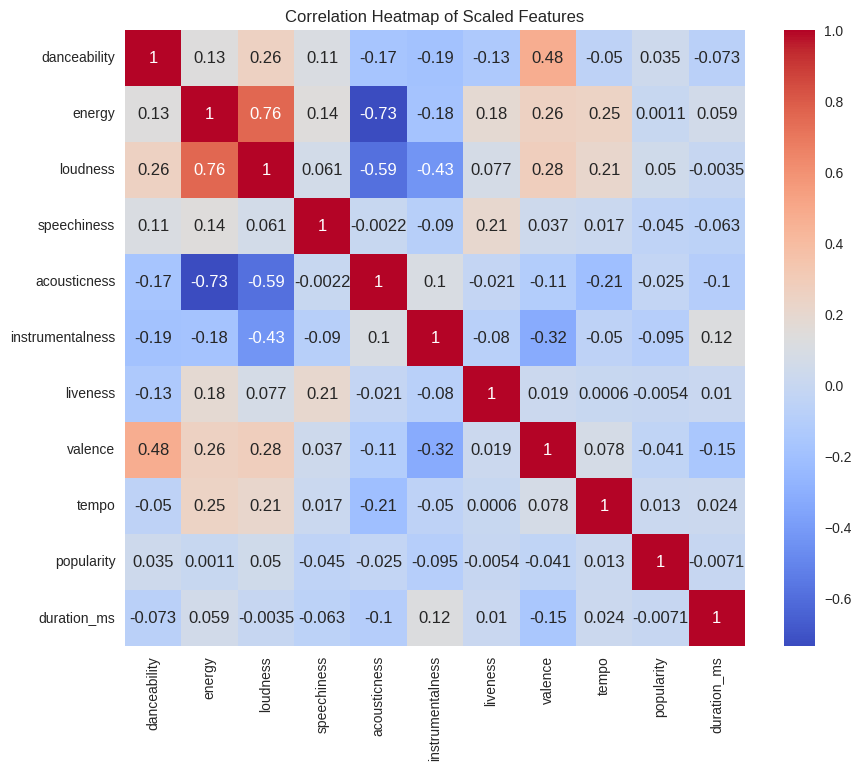

In [61]:
scaled_df = pd.DataFrame(num_scaled, columns=numerical_features)
corr = scaled_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Scaled Features')
plt.show()


In [62]:
tfidf = TfidfVectorizer()
artist_tfidf = tfidf.fit_transform(df['artists'])

In [100]:
genre_tfidf = tfidf.fit_transform(df['track_genre'])
title_tfidf = tfidf.fit_transform(df['track_name'])
album_tfidf = tfidf.fit_transform(df['album_name'])

In [106]:
from sklearn.preprocessing import normalize

In [123]:
title_weight = 0.6
weighted_title_tfidf = normalize(title_tfidf) * title_weight

In [124]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

In [108]:
final_song_vectors = hstack([csr_matrix(num_scaled), genre_tfidf, artist_tfidf, weighted_title_tfidf, album_tfidf])

In [110]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [111]:
# trying to determine optimal number of clusters using the elbow method
k_range = range(1,31)
wcss = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state= 53)
    kmeans.fit(final_song_vectors)
    wcss.append(kmeans.inertia_)

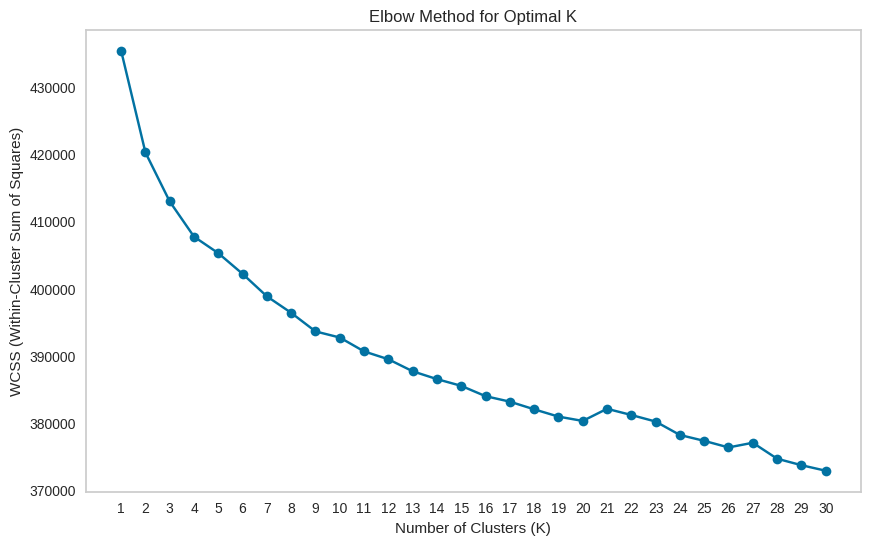

In [112]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.grid()
plt.show()

In [113]:
print(f"Final feature matrix shape: {final_song_vectors.shape}")
kmeans = KMeans(n_clusters=15, random_state=42)
clusters = kmeans.fit_predict(final_song_vectors)

Final feature matrix shape: (113999, 112702)


In [114]:
knn_10 = NearestNeighbors(n_neighbors=10, metric='cosine')
knn_10.fit(final_song_vectors)

NearestNeighbors(metric='cosine', n_neighbors=10)

In [115]:
print(f"Clustering done : {len(set(clusters))} clusters")

Clustering done : 15 clusters


In [116]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

In [117]:
track_index = {name.lower(): idx for idx, name in enumerate(df['track_name'])}

(array([-5.,  0.,  5., 10., 15., 20.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20')])

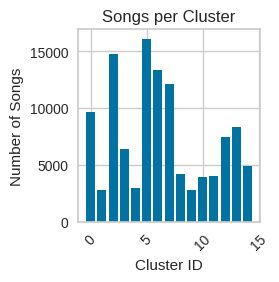

In [118]:
plt.subplot(2, 3, 1)
cluster_counts = np.bincount(clusters)
plt.bar(range(len(cluster_counts)), cluster_counts)
plt.xlabel('Cluster ID')
plt.ylabel('Number of Songs')
plt.title('Songs per Cluster')
plt.xticks(rotation=45)

In [119]:
top_genres = df['track_genre'].value_counts().head(10).index
print(top_genres)

Index(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime',
       'black-metal', 'bluegrass', 'blues', 'brazil'],
      dtype='object', name='track_genre')


In [120]:
def recommend_songs_cluster(liked_songs, top_n=10, max_k_j=2, show_matches=True):
    # Track matched songs
    matched = []
    unmatched = []
    liked_indices = []

    for name in liked_songs:
        name_lower = name.lower()
        if name_lower in track_index:
            liked_indices.append(track_index[name_lower])
            matched.append(name)
        else:
            unmatched.append(name)

    if show_matches:
        print("Matched:", matched)
        print("Not found:", unmatched)

    if not liked_indices:
        return "No liked songs found in dataset."

    k_j_genres = ['k-pop', 'j-pop', 'j-rock', 'j-dance', 'j-idol']
    liked_k_j_count = 0
    for idx in liked_indices:
        genre = str(df.iloc[idx]['track_genre']).lower().strip()
        if genre in k_j_genres:
            liked_k_j_count += 1

    if liked_k_j_count >= 4:
        k_j_limit = top_n  # No limit if user clearly likes K/J
        print(f"User likes {liked_k_j_count} K/J songs - no genre limit applied")
    else:
        k_j_limit = max_k_j
        print(f"User likes {liked_k_j_count} K/J songs - limiting to {k_j_limit} K/J recommendations")

    # Get clusters for liked songs
    liked_clusters = clusters[liked_indices]
    cluster_counts = Counter(liked_clusters)
    target_cluster = cluster_counts.most_common(1)[0][0]
    cluster_songs = np.where(clusters == target_cluster)[0]

    # Use nearest neighbors within cluster for fine-grained recommendations
    cluster_vectors = final_song_vectors[cluster_songs]
    liked_vectors = final_song_vectors[liked_indices]

    # Find average of liked songs
    user_profile = np.asarray(liked_vectors.mean(axis=0))

    # Get similarities to all songs in cluster
    similarities = cosine_similarity(user_profile, cluster_vectors).flatten()

    # Rank by similarity
    ranked_cluster_indices = similarities.argsort()[::-1]

    # Filter out duplicates, liked songs, and apply K/J limits
    seen_names = set()
    recommended_indices = []
    k_j_count = 0

    for idx in ranked_cluster_indices:
        actual_idx = cluster_songs[idx]
        name = df.iloc[actual_idx]['track_name']
        genre = str(df.iloc[actual_idx]['track_genre']).lower().strip()

        if actual_idx in liked_indices or name in seen_names:
            continue

        # Check K/J genre limit
        is_k_j = genre in k_j_genres
        if is_k_j and k_j_count >= k_j_limit:
            continue

        seen_names.add(name)
        recommended_indices.append(actual_idx)

        if is_k_j:
            k_j_count += 1

        if len(recommended_indices) == top_n:
            break

    result_df = df.iloc[recommended_indices][['track_name', 'artists', 'track_genre']]

    # Show genre distribution
    if show_matches:
        genre_dist = result_df['track_genre'].value_counts()
        print(f"\nRecommendation genre distribution:")
        for genre, count in genre_dist.head(8).items():
            print(f"  {genre}: {count}")

    return result_df

In [121]:
# Get recommendations using the cluster-based function
from collections import Counter
liked_songs = [
    "Samne Ye Kaun Aya",
    "Main Shayar To Nahin",
    "Aajkal Tere Mere",
    "Apna Dil To Awara",
    "Maahi Ve"
]
recommendations = recommend_songs_cluster(liked_songs, top_n=10)
print("Recommended Songs:")
print(recommendations)

# Optional: Also check which cluster your liked songs belong to
print("\nCluster analysis of liked songs:")
liked_indices = []
for name in liked_songs:
    name_lower = name.lower()
    if name_lower in track_index:
        idx = track_index[name_lower]
        liked_indices.append(idx)
        cluster_id = clusters[idx]
        print(f"'{name}' -> Cluster {cluster_id}")

if liked_indices:
    from collections import Counter
    cluster_counts = Counter(clusters[liked_indices])
    print(f"\nCluster distribution: {dict(cluster_counts)}")
    print(f"Target cluster: {cluster_counts.most_common(1)[0][0]}")

Matched: ['Maahi Ve']
Not found: ['Samne Ye Kaun Aya', 'Main Shayar To Nahin', 'Aajkal Tere Mere', 'Apna Dil To Awara']
User likes 0 K/J songs - limiting to 2 K/J recommendations

Recommendation genre distribution:
  pop-film: 10
Recommended Songs:
                track_name                                            artists  \
80210        Kal Ho Naa Ho                      Shankar-Ehsaan-Loy;Sonu Nigam   
80737              Lakshya               Shankar-Ehsaan-Loy;Shankar Mahadevan   
80960  Slow Motion Angreza  Shankar-Ehsaan-Loy;Sukhwinder Singh;Loy Mendon...   
80170                Mitwa  Shankar-Ehsaan-Loy;Shankar Mahadevan;Caralisa ...   
80964  Neend Churayee Meri  Kumar Sanu;Udit Narayan;Alka Yagnik;Kavita Kri...   
80257             G.O.A.T.                                     Diljit Dosanjh   
80461      Tumhi Dekho Naa          Shankar-Ehsaan-Loy;Sonu Nigam;Alka Yagnik   
80973        Salaam-E-Ishq  Sonu Nigam;Shreya Ghoshal;Kunal Ganjawala;Sadh...   
80716                T